In [1]:
from scipy.signal import butter, lfilter
import fastdyn_fic_dmf as dmf
import numpy as np
import matplotlib.pyplot as plt
# Fetch default parameters
import tracemalloc
from scipy.io import loadmat
from scipy.stats import zscore, pearsonr
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Helper functions
def compute_fcd(data, wsize, overlap, isubdiag):
    T, N = data.shape
    win_start = np.arange(0, T - wsize - 1, wsize - overlap)
    nwins = len(win_start)
    fcd = np.zeros((len(isubdiag[0]), nwins))
    print(fcd.shape)
    print(data.shape)
    print((data[win_start[2]:win_start[2] + wsize + 1, :]).shape)
    for i in range(nwins):
        tmp = data[win_start[i]:win_start[i] + wsize + 1, :]
        cormat = np.corrcoef(tmp.T)
        fcd[:, i] = cormat[isubdiag[0],isubdiag[1]]
    return fcd


# Figure 0 para Rodrigo Cofre

### Panel 1a: For G = 2.1 and LOW LR FIC per region is the same as linear solution

Calling run


Text(0.5, 1.0, 'Per region FIC comparison G=2.11 LR=10')

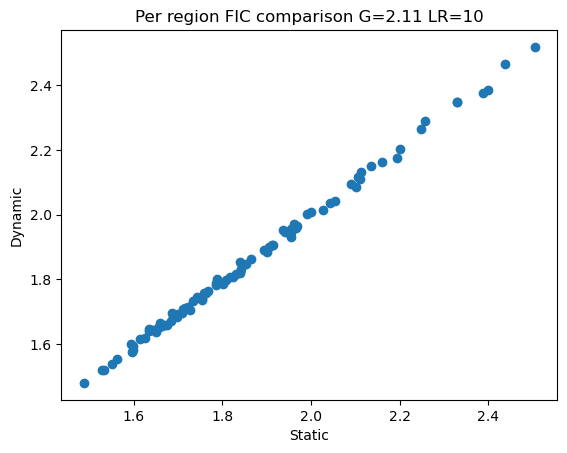

In [10]:
nb_steps = 100000
C = loadmat('../SC_and_5ht2a_receptors.mat')['sc90']
C = 0.2*C/np.max(C)
coeffs = loadmat('./data/LinearFitCoefficients.mat')
a = coeffs['a'][0][0]
b = coeffs['b'][0][0]

params = dmf.default_params(C=C)
params['seed'] = 1
params['G'] = 2.1
params['obj_rate'] = 3.44
LR = 10
DECAY = np.exp(a+np.log(LR)*b)
params['taoj'] = DECAY
params['lrj'] = LR
params['J'] = 0.75*params['G']*params['C'].sum(axis=0).squeeze() + 1
N = C.shape[0]
with_decay = True
with_plasticity = True
rates, rates_inh, bold, fic_t = dmf.run(params, nb_steps,return_rate=True, return_bold=True, return_fic=True, with_plasticity=with_plasticity, with_decay=with_decay)
brunout = 5

dyn_fic = np.mean(fic_t, axis=1)
stat_fic = params['J']

fig1a, ax1a = plt.subplots()
ax1a.scatter(stat_fic,dyn_fic,marker='o')
plt.xlabel("Static")
plt.ylabel("Dynamic")
plt.title("Per region FIC comparison G=2.11 LR=10")

Calling run


Text(0.5, 1.0, 'Per region FIC comparison G=2.11 LR=200')

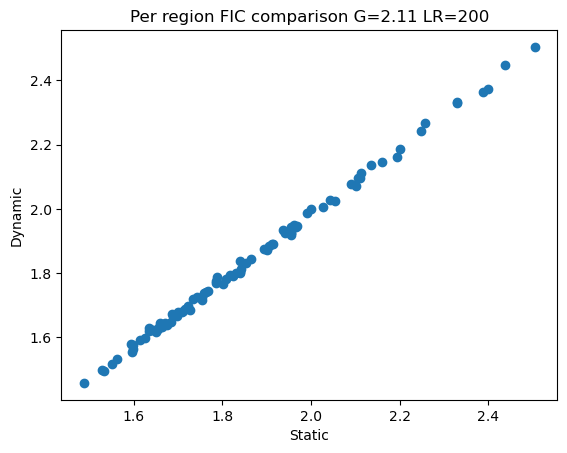

In [11]:
nb_steps = 100000
C = loadmat('../SC_and_5ht2a_receptors.mat')['sc90']
C = 0.2*C/np.max(C)
coeffs = loadmat('./data/LinearFitCoefficients.mat')
a = coeffs['a'][0][0]
b = coeffs['b'][0][0]

params = dmf.default_params(C=C)
params['seed'] = 1
params['G'] = 2.1
params['obj_rate'] = 3.44
LR = 200
DECAY = np.exp(a+np.log(LR)*b)
params['taoj'] = DECAY
params['lrj'] = LR
params['J'] = 0.75*params['G']*params['C'].sum(axis=0).squeeze() + 1
N = C.shape[0]
with_decay = True
with_plasticity = True
rates, rates_inh, bold, fic_t = dmf.run(params, nb_steps,return_rate=True, return_bold=True, return_fic=True, with_plasticity=with_plasticity, with_decay=with_decay)
brunout = 5

dyn_fic = np.mean(fic_t, axis=1)
stat_fic = params['J']

fig1b, ax1b = plt.subplots()
ax1b.scatter(stat_fic,dyn_fic,marker='o')
plt.xlabel("Static")
plt.ylabel("Dynamic")
plt.title("Per region FIC comparison G=2.11 LR=200")

### Panel 2: Homeostatic curve

In [12]:
hom_fit_data = loadmat("./Results/Figure0/iter_1.mat")

In [13]:
hom_fit_data

{'__header__': b'MATLAB 5.0 MAT-file, Platform: GLNXA64, Created on: Fri Jan 12 23:43:47 2024',
 '__version__': '1.0',
 '__globals__': [],
 'None': MatlabOpaque([(b'results', b'MCOS', b'BayesianOptimization', array([[3707764736],
                      [         2],
                      [         1],
                      [         1],
                      [         1],
                      [        11]], dtype=uint32))                               ],
              dtype=[('s0', 'O'), ('s1', 'O'), ('s2', 'O'), ('arr', 'O')]),
 '__function_workspace__': array([[ 0,  1, 73, ...,  0,  0,  0]], dtype=uint8)}

# Figure 1

# Figure 3

### Dynamic LR vs G CNT fit

Text(0, 0.5, 'G')

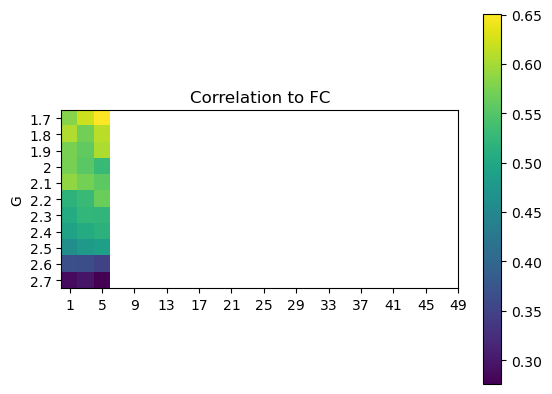

In [4]:
G_range = [1.7,1.8,1.9,2,2.1,2.2,2.3,2.4,2.5,2.6,2.7]
LR_range = np.arange(1,51,2)
fcs = np.load('./Results/fit_coma_cnt/fit_fc_grid-static.npy')
fig, ax = plt.subplots()
pos = ax.imshow(fcs)


ytick_positions = range(0, len(G_range), 1)
ax.set_yticks(ytick_positions)
ax.set_yticklabels([G_range[i] for i in ytick_positions])

xtick_positions = range(0, len(LR_range), 2)
ax.set_xticks(xtick_positions)
ax.set_xticklabels([int(LR_range[i]) for i in xtick_positions])


fig.colorbar(pos, ax=ax)
plt.title("Correlation to FC")
plt.ylabel("G")


### Static LR vs G CNT fit